# K-means

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [33]:
points = np.genfromtxt('Skin_NonSkin.txt', delimiter = '\t')

### Main functions

In [35]:
def initialize_centroids(points, k):
    '''
        Selects k random points as initial
        points from dataset
    '''
    indices = np.random.permutation(points.shape[0])
    return points[indices[:k]]

In [36]:
initialize_centroids(points, 3)

array([[ 129.,  135.,   94.,    2.],
       [  96.,   57.,   72.,    2.],
       [   3.,    3.,    0.,    2.]])

In [37]:
def closest_centroid(points, centroids):
    '''
        Returns an array containing the index to the nearest centroid for each point
    '''
    dists = np.sqrt(((points-centroids[:, np.newaxis])**2).sum(axis=2))
    
    return np.argmin(dists, axis=0)

In [38]:
centroids = initialize_centroids(points, 3)
print("centroids", centroids)
print("points", points)
print((points-centroids[:, np.newaxis]).shape)
closest = closest_centroid(points, centroids)
    
print(closest)

centroids [[ 137.  134.   79.    2.]
 [ 130.  134.   93.    2.]
 [ 149.  151.  105.    2.]]
points [[  74.   85.  123.    1.]
 [  73.   84.  122.    1.]
 [  72.   83.  121.    1.]
 ..., 
 [ 163.  162.  112.    2.]
 [ 163.  162.  112.    2.]
 [ 255.  255.  255.    2.]]
(3, 245057, 4)
[1 1 1 ..., 2 2 2]


In [39]:
def move_centroids(points, closest, centroids):
    '''
        Returns the new centroids assigned from the points closest to them
    '''
    return np.array([points[closest==i].mean(axis=0) for i in range(centroids.shape[0])])

In [40]:
print(centroids.shape[0])
for i in range(centroids.shape[0]):
    print (points[closest==i].mean(axis=0))
print(points[:3].mean(axis=0))

3
[ 63.76516061  63.04848589  27.41633028   2.        ]
[  76.43993407   96.05697837  138.67909071    1.6086058 ]
[ 167.20318438  174.84894508  162.49488403    1.75079681]
[  73.   84.  122.    1.]


In [41]:
def main(points):
    num_iterations = 100
    k = 3
        
    # Initialize centroids
    centroids = initialize_centroids(points, k)
    
    # Run iterative process
    for i in range(num_iterations):
        closest = closest_centroid(points, centroids)
        centroids = move_centroids(points, closest, centroids)
    
    return centroids

In [42]:
centroids = main(points)

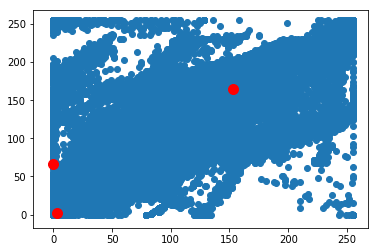

In [43]:
centroids = initialize_centroids(points, 3)

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
ax = plt.gca()

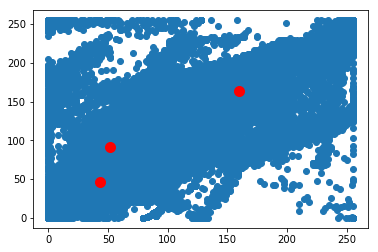

In [44]:
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
ax = plt.gca()